In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
file = r"D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\FINAL_CLUSTER.csv"
#file = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\REGRESSION.csv'
df1_loc = pd.read_csv(file)

In [4]:
df1_loc.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,tripduration,starttime,stoptime,start station id,...,usertype,birth year,gender,Start Date,Start Time,End Date,End Time,Start Hour,End Hour,cluster_label
0,0,0,0,0,0,0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,...,1,1971,1,2019-01-01,00:01:47.401000,2019-01-01,00:07:07.581000,0,0,1
1,1,1,1,1,1,1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,...,1,1964,1,2019-01-01,00:04:43.736000,2019-01-01,00:10:00.608000,0,0,1
2,2,2,2,2,2,2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,...,1,1987,1,2019-01-01,00:06:03.997000,2019-01-01,00:15:55.438000,0,0,1
3,3,3,3,3,3,3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,...,1,1990,1,2019-01-01,00:07:03.545000,2019-01-01,00:52:22.650000,0,0,0
4,4,4,4,4,4,4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,...,1,1979,1,2019-01-01,00:07:35.945000,2019-01-01,00:12:39.502000,0,0,0


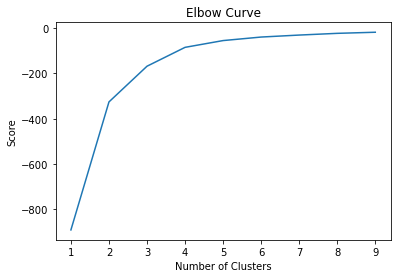

In [5]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df1_loc[['start station latitude']]
X_axis = df1_loc[['start station longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [6]:
X = df1_loc[['start station latitude', 'start station longitude']]
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [7]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X) # Compute k-means clustering.

KMeans(n_clusters=3)

In [8]:
print(X)

        start station latitude  start station longitude
0                    40.778968               -73.973747
1                    40.751873               -73.977706
2                    40.785247               -73.976673
3                    40.732219               -73.981656
4                    40.727434               -73.993790
...                        ...                      ...
967282               40.668132               -73.973638
967283               40.668132               -73.973638
967284               40.668132               -73.973638
967285               40.668132               -73.973638
967286               40.668132               -73.973638

[967287 rows x 2 columns]


In [9]:
print(df1_loc)

        Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0                0             0               0                 0   
1                1             1               1                 1   
2                2             2               2                 2   
3                3             3               3                 3   
4                4             4               4                 4   
...            ...           ...             ...               ...   
967282      967282        967282          967282            967282   
967283      967283        967283          967283            967283   
967284      967284        967284          967284            967284   
967285      967285        967285          967285            967285   
967286      967286        967286          967286            967286   

        Unnamed: 0.1.1.1.1  Unnamed: 0.1.1.1.1.1  tripduration  \
0                        0                     0           320   
1                        1 

In [11]:
X['cluster_label'] = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X) # Labels of each point
X.head(10)
X['start station id'] = df1_loc['start station id']

<ipython-input-11-c73ab87ef69e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_label'] = kmeans.fit_predict(X)
<ipython-input-11-c73ab87ef69e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['start station id'] = df1_loc['start station id']


In [12]:
print(type(X['cluster_label']))

<class 'pandas.core.series.Series'>


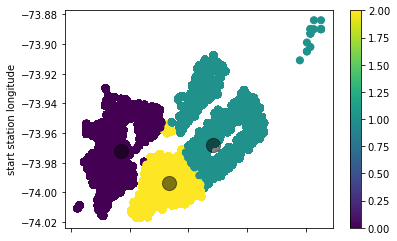

In [13]:
X.plot.scatter(x = 'start station latitude', y = 'start station longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [15]:
final_file = r"D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\REGRESSION.csv"
df_final = pd.read_csv(final_file)
df_final['cluster_label'] = X['cluster_label']
df_final['start station id'] = X['start station id']
df_final.to_csv(final_file)